In [1]:
import os, sys
import numpy as np
import pandas as pd
import dowhy.api


In [14]:
N = 5000
z = np.random.uniform(size=N)
z

array([0.34341327, 0.54975667, 0.81998194, ..., 0.6038528 , 0.49262117,
       0.67950753])

In [15]:
d = np.random.binomial(1., p=1. / (1. + np.exp(-5. * z)))
d

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
y = 2. * z + d + 0.1 * np.random.normal(size=N)
y

array([1.70193083, 2.16358037, 2.74544809, ..., 2.04610291, 1.87921562,
       2.46558884])

In [17]:
df = pd.DataFrame({'Z': z, 'D': d, 'Y': y})
df

,Z,D,Y
0,0.343413,1,1.701931
1,0.549757,1,2.163580
2,0.819982,1,2.745448
3,0.645566,1,2.375953
4,0.766426,1,2.434074
...,...,...,...
4995,0.562789,1,2.131551
4996,0.440326,1,1.740964
4997,0.603853,1,2.046103
4998,0.492621,1,1.879216


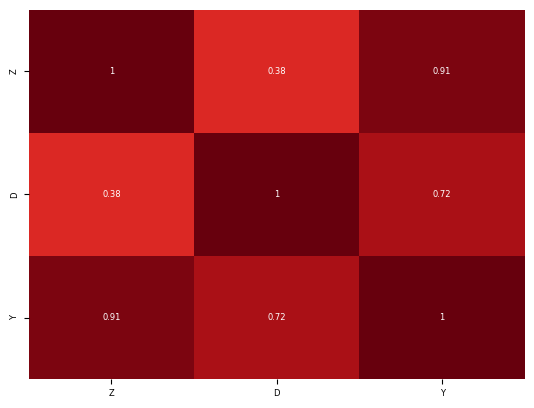

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 6
sns.heatmap(df.corr(),
            cmap='Reds',
            center=0,
            cbar=False,
            annot=True)
plt.show()

In [6]:
(df[df.D == 1].mean() - df[df.D == 0].mean())['Y']

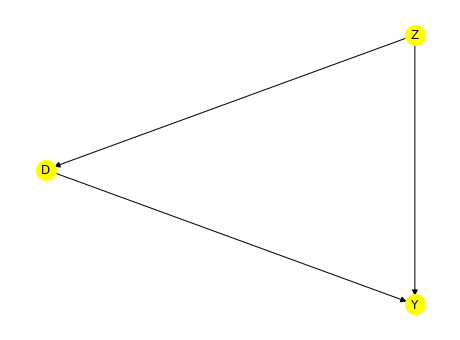

In [9]:
from dowhy import CausalModel

causes = ['D']
outcomes = ['Y']
common_causes = ['Z']

model = CausalModel(df,
                    causes,
                    outcomes,
                    common_causes=common_causes)
model.view_model()

In [10]:
identification = model.identify_effect(proceed_when_unidentifiable=True)
identification

In [11]:
from dowhy.do_samplers.weighting_sampler import WeightingSampler

sampler = WeightingSampler(df,
                           causal_model=model,
                           keep_original_treatment=True,
                           variable_types={'D': 'b', 'Z': 'c', 'Y': 'c'})

sampler

In [12]:
interventional_df = sampler.do_sample(None)
interventional_df

,Z,D,Y,propensity_score,weight
0,0.285145,1,1.505440,0.799847,1.250239
1,0.449720,1,2.072644,0.895713,1.116429
2,0.746381,1,2.497007,0.971521,1.029314
3,0.781397,1,2.726347,0.975696,1.024910
4,0.493499,1,2.075925,0.913252,1.094988
...,...,...,...,...,...
4995,0.037062,0,0.127971,0.442271,2.261058
4996,0.082751,1,1.295370,0.609299,1.641230
4997,0.131547,1,1.296017,0.661779,1.511079
4998,0.019186,1,0.934637,0.537142,1.861705


In [13]:
(interventional_df[interventional_df.D == 1].mean() - interventional_df[interventional_df.D == 0].mean())['Y']